#### Step 1: Import Libraries
For this project, we need Numpy, Matplotlib, Pandas, Seaborn, Datetime, XLRD

In [1]:
# Import and Install Libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from plotly.subplots import make_subplots

import xlrd

from datetime import datetime

# Display dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

#### Step 2: Data Exploration
The various datasets used in this project will explored (viewed).

In [2]:
# Read the Cab_Data
cab = pd.read_csv('Cab_Data.csv')

# Show data shape
cab.shape

# Get full info on Cab_Data dataset
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [3]:
# Show Cab_Data
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
# Read the City dataset 
city = pd.read_csv('City.csv')

# Show City data shape
city.shape

# Get fully info on City dataset
city.info

<bound method DataFrame.info of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [5]:
# Show City data set
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
# Read Customer_ID dataset
customer = pd.read_csv('Customer_ID.csv')

# Show Customer_ID data shape
customer.shape

# Get full info Customer_ID on dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# Show Customer_ID
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [8]:
# Read the Transaction_ID dataset 
transactions = pd.read_csv('Transaction_ID.csv')

# Show Transaction_ID data shape
transactions.shape

# Get full info on Transaction_ID dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [9]:
# Show Transaction_ID
transactions

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [10]:
# Load the US Holiday Dates (2004-2021) data
holiday_data = pd.read_csv('US Holiday Dates (2004-2021).csv')

# Show US Holiday Dates (2004-2021) data shape
holiday_data.shape

# Get full info on the US Holiday Dates dataset
holiday_data.info

<bound method DataFrame.info of            Date         Holiday    WeekDay  Month  Day  Year
0    2004-07-04     4th of July     Sunday      7    4  2004
1    2005-07-04     4th of July     Monday      7    4  2005
2    2006-07-04     4th of July    Tuesday      7    4  2006
3    2007-07-04     4th of July  Wednesday      7    4  2007
4    2008-07-04     4th of July     Friday      7    4  2008
..          ...             ...        ...    ...  ...   ...
337  2006-04-16  Western Easter     Sunday      4   16  2006
338  2017-04-16  Western Easter     Sunday      4   16  2017
339  2014-04-20  Western Easter     Sunday      4   20  2014
340  2019-04-21  Western Easter     Sunday      4   21  2019
341  2011-04-24  Western Easter     Sunday      4   24  2011

[342 rows x 6 columns]>

In [11]:
# Show Transaction_ID
holiday_data

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


#### Step 3: Data Cleaning
Data sets in use during this analysis will be reviewed and necessary type conversions and deletions made to inhibit errors and improve accuracy.

In [12]:
# Data Cleaning of the Cab_Data dataset

# Convert travel dates in US Holiday Dates datafile to datetime
cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x : xlrd.xldate_as_datetime(x, 0))

In [13]:
# Display the data fields we need for analysis
cab[['KM Travelled','Price Charged','Cost of Trip']].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [14]:
# Change the figures under the column "Cost of Trip" to two decimal points float
cab['Cost of Trip'] = cab['Cost of Trip'].apply(lambda x: round(x, 2))
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05


In [15]:
# Display unique transaction ID in the Transaction_ID dataset:
print("Total number of unique transaction IDs in the file is: {}".format(len(cab['Transaction ID'].unique())))

# Check for duplicated transaction IDs in the  Transaction_ID dataset:
print("We have a total of:",cab['Transaction ID'].duplicated().sum(), "duplicated or non-unique transaction IDs")

# Total number of empty or null values:
cab.isnull().sum()

Total number of unique transaction IDs in the file is: 359392
We have a total of: 0 duplicated or non-unique transaction IDs


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [16]:
# Data Cleaning of the Customer_ID dataset

# Display unique customer ID in the Customer_ID dataset:
print("Number of unique IDs: {}".format(len(customer['Customer ID'].unique())))

# Check for duplicated transaction IDs in the  Transaction_ID dataset:
print("Number of duplicated records before dropping:",customer['Customer ID'].duplicated().sum())

# Total number of empty or null values:
customer.isnull().sum()

Number of unique IDs: 49171
Number of duplicated records before dropping: 0


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [17]:
# Data Cleaning of the Transaction_ID dataset

# Display unique customer ID in the Customer_ID dataset:
print("Number of unique IDs: {}".format(len(transactions['Transaction ID'].unique())))

# Check for duplicated transaction IDs in the  Transaction_ID dataset:
print("Number of duplicated records before dropping:",transactions['Transaction ID'].duplicated().sum())

# Check for empty cells in the Transaction_ID dataset
transactions.isnull().sum()

Number of unique IDs: 440098
Number of duplicated records before dropping: 0


Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [18]:
# Data Cleaning of the City dataset

# Conversion of the Population and Users data fields from string to number datatype
city['Population'] = pd.to_numeric(city['Population'].str.replace(',','')) # Remove commas which are not part of the integers or floats
city['Users'] = pd.to_numeric(city['Users'].str.replace(',','')) 

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [19]:
# Statistics for numerical datafields in the City dataset
city.describe()

# Check for empty cells in the City dataset
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [20]:
# Data Cleaning of the US Holiday Dates dataset

# Conversion of the Date datafield datetime datatype
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])

holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
 3   Month    342 non-null    int64         
 4   Day      342 non-null    int64         
 5   Year     342 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.2+ KB


In [21]:
# Check for empty cells in the US Holiday Dates (2004-2021) dataset
holiday_data.isnull().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

#### Step 4: Preliminary Data Visualizations

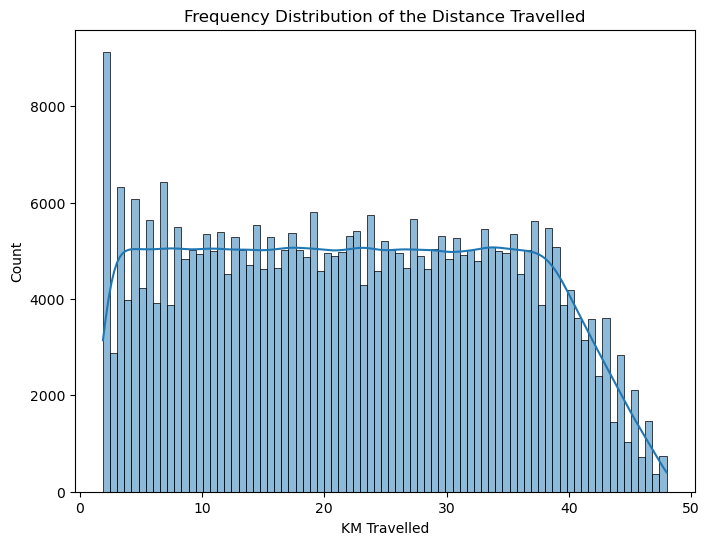

In [22]:
# Showing the frequency distribution of distance travelled using the Cab_Data dataset
plt.figure(figsize=(8, 6))
sns.histplot(cab['KM Travelled'], kde=True)
plt.title('Frequency Distribution of the Distance Travelled') # Set the title of the plot

# Display the plot
plt.show()

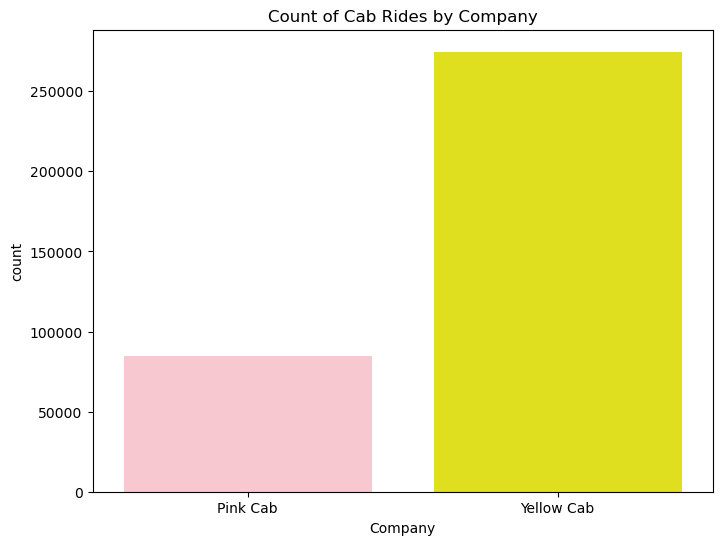

In [23]:
# Using plots to show the count of cab rides based on Company

# Define custom colors for each category
colors = ['pink', 'yellow']

plt.figure(figsize=(8, 6))
sns.countplot(cab['Company'], palette=colors)  # Set the color to colors as set above
plt.title('Count of Cab Rides by Company') # Set the title of the plot

# Display the plot
plt.show()

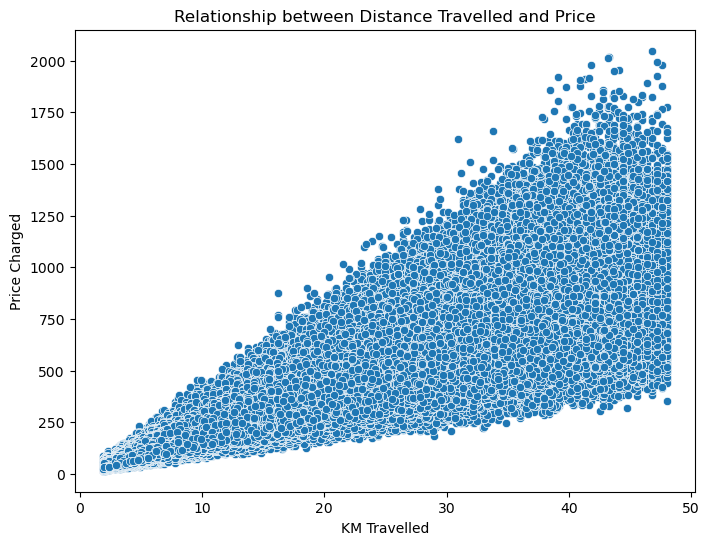

In [24]:
# Plot to show the relationship between distance travelled and the price using the Cab_Data dataset

plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM Travelled', y='Price Charged', data=cab)
plt.title('Relationship between Distance Travelled and Price') # Set the title of the plot

# Display the plot
plt.show()

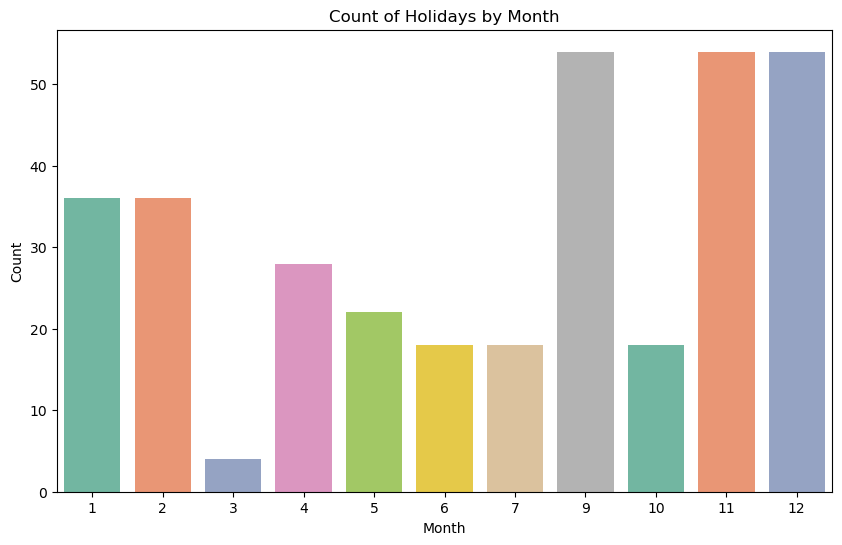

In [25]:
# Perform analysis using the US Holiday Dates and Cab_Data datasets to find relationships:

plt.figure(figsize=(10, 6))
sns.countplot(x="Month", data=holiday_data, palette="Set2")

# Set the title and labels for the plot
plt.title("Count of Holidays by Month")
plt.xlabel("Month")
plt.ylabel("Count")

# Display the plot
plt.show()

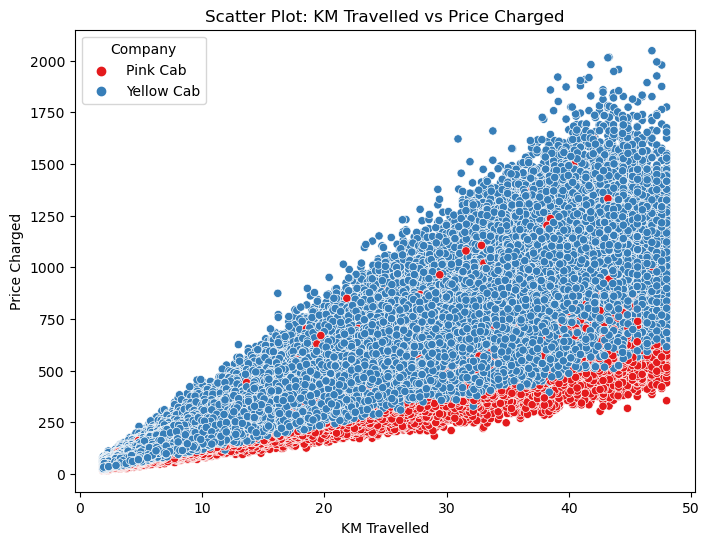

In [26]:
# Generate a scatterplot to visualize the price to kilometer travelled distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x="KM Travelled", y="Price Charged", data=cab, hue="Company", palette="Set1")

# Set the title and labels for the plot
plt.title("Scatter Plot: KM Travelled vs Price Charged")
plt.xlabel("KM Travelled")
plt.ylabel("Price Charged")

# Display the plot
plt.show()

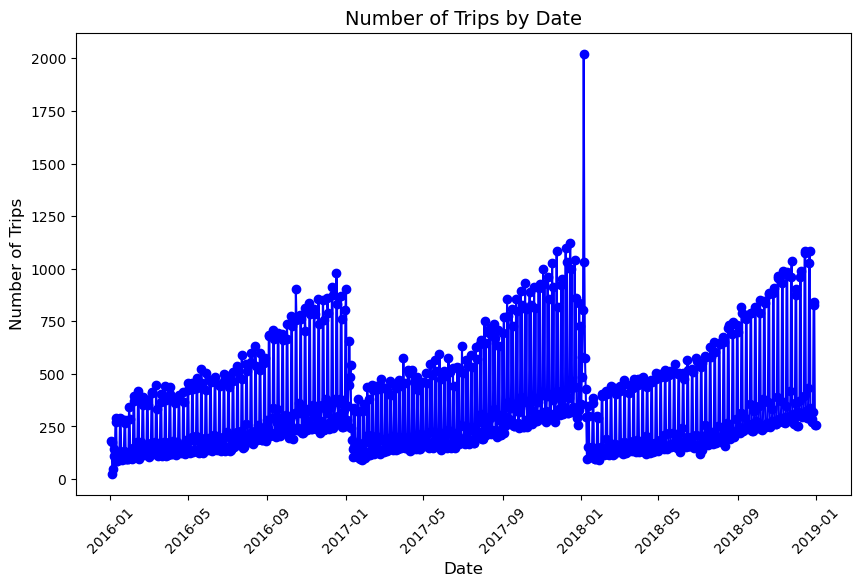

In [27]:
# # Analyze the trip distribution by date

# Create a dataframe to count the trips for each date
trips_by_date = cab['Date of Travel'].value_counts().sort_index().reset_index()
trips_by_date.columns = ['Date', 'Trips']

# Generate a line plot to visualize the trip distribution
plt.figure(figsize=(10, 6))
plt.plot(trips_by_date['Date'], trips_by_date['Trips'], color='blue', marker='o', linestyle='-')

# Set the title and labels for the plot
plt.title('Number of Trips by Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [28]:
customer[['Age','Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


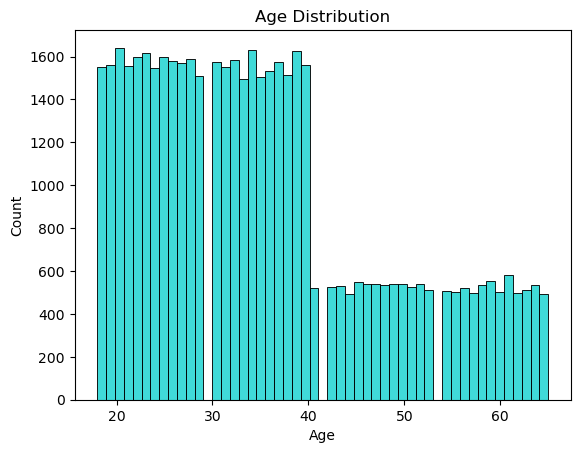

In [29]:
# Visualize the Age distribution of the customers

# Create a histogram plot to show the age distribution
sns.histplot(customer['Age'], color='#00CECB')

# Set the title for the plot
plt.title('Age Distribution')

# Display the plot
plt.show()

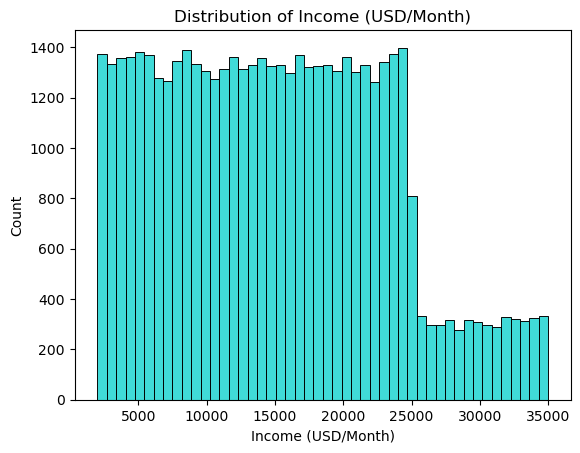

In [30]:
# Analyze the distribution of income

# Create a histogram plot to visualize the income distribution
sns.histplot(customer['Income (USD/Month)'], color='#00CECB')

# Set the plot title
plt.title('Distribution of Income (USD/Month)')

# Display the plot
plt.show()


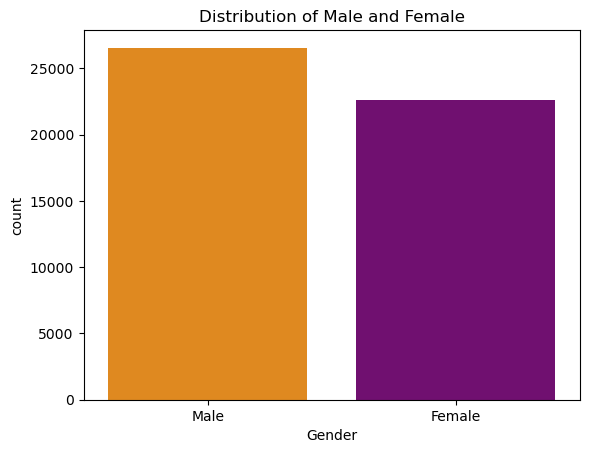

In [31]:
# Show gender distribution

# Define the color palette for gender categories
gender_palette = {'Male': "#FF8C00", 'Female': "#800080"}

# Create a count plot to visualize the distribution of gender
sns.countplot(customer['Gender'], palette=gender_palette)

# Set the title for the plot
plt.title('Distribution of Male and Female')

# Display the plot
plt.show()

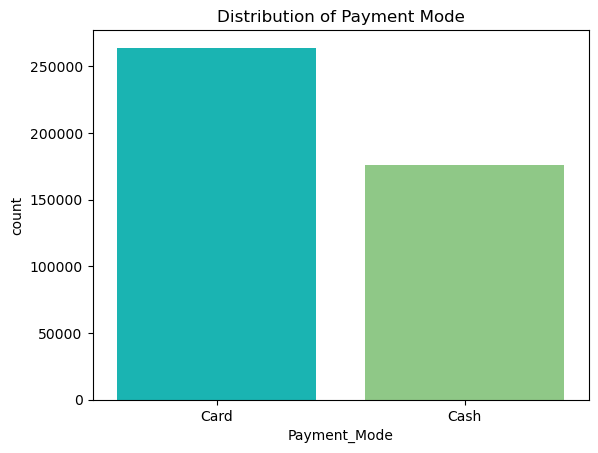

In [32]:
# Check the distribution of payment mode
payment_palette = {'Cash': '#87D37C', 'Card': '#00CECB'}  # Define custom color palette for payment mode

# Create a countplot to visualize the distribution of payment mode
sns.countplot(x="Payment_Mode", data=transactions, palette=payment_palette)

# Set the title for the plot
plt.title('Distribution of Payment Mode')

# Show the plot
plt.show()


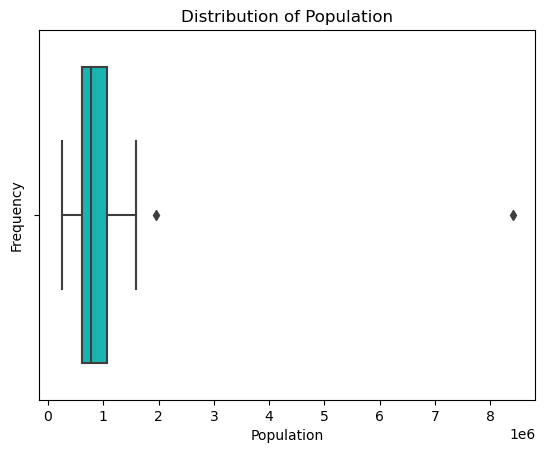

In [33]:
# Visualize the distribution of the population

# Create a box plot to show the distribution of population
sns.boxplot(city['Population'], color='#00CECB')

# Set the title and axis labels
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Display the plot
plt.show()


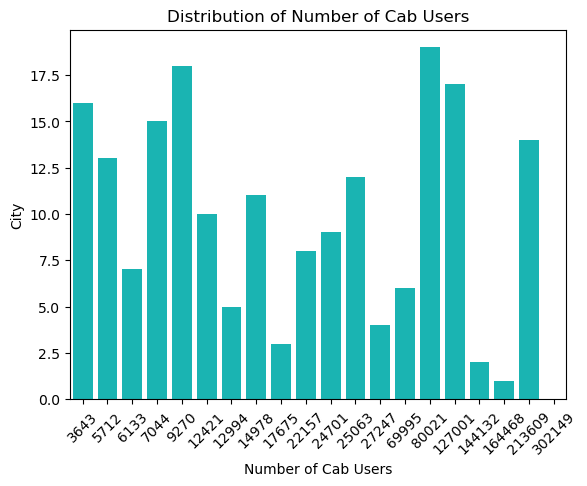

In [34]:
# Bar plot of cab users
sns.barplot(x=city['Users'], y=city.index, color='#00CECB')

# Set the title and axis labels
plt.title('Distribution of Number of Cab Users')
plt.xlabel('Number of Cab Users')
plt.ylabel('City')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

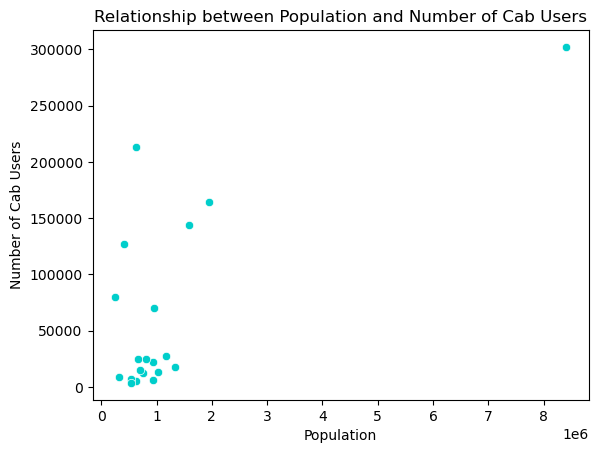

In [35]:
# Create a scatter plot to visualize the relationship between population and number of cab users

# Use scatterplot to plot population and number of cab users
sns.scatterplot(data=city, x='Population', y='Users', color='#00CECB')

# Set the title and axis labels
plt.title('Relationship between Population and Number of Cab Users')
plt.xlabel('Population')
plt.ylabel('Number of Cab Users')

# Display the plot
plt.show()

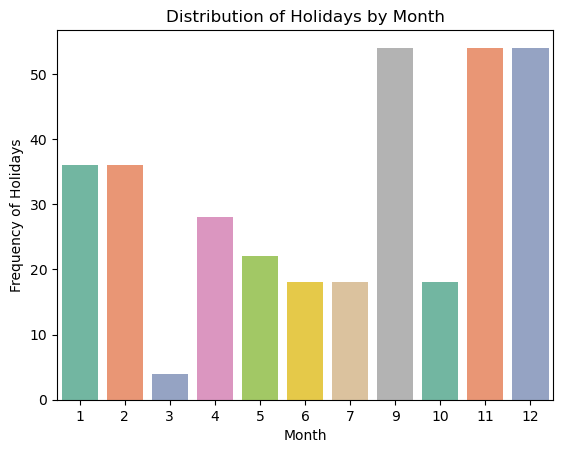

In [36]:
# Analyze the distribution of holidays by month

# Plot a count of holidays by month using a bar plot
sns.countplot(holiday_data['Month'], palette='Set2')  # Set2 color palette for variety
plt.title('Distribution of Holidays by Month')
plt.ylabel('Frequency of Holidays')

# Display the plot
plt.show()

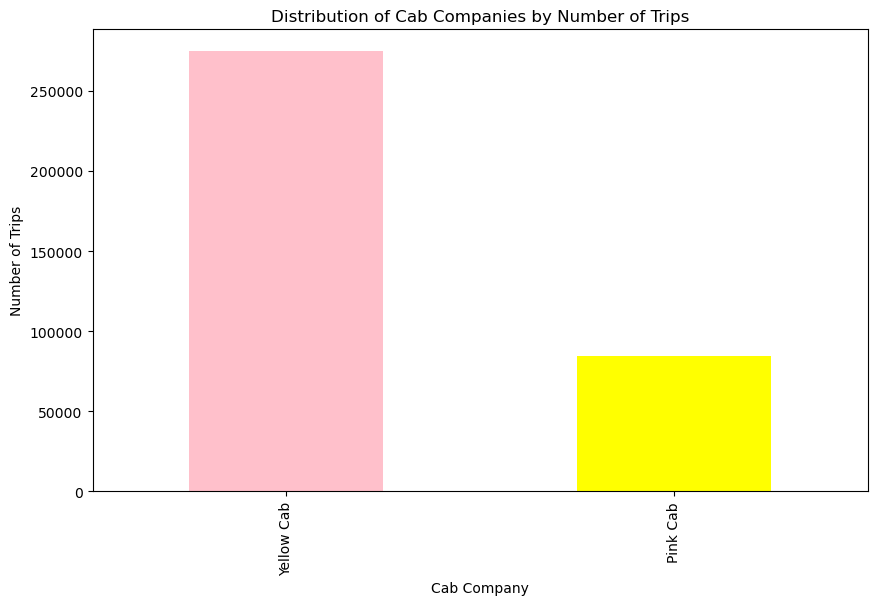

In [37]:
# Calculate the total number of trips for each cab company
company_counts = cab['Company'].value_counts()

# Plot a bar plot to visualize the distribution of cab companies
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color=colors)
plt.xlabel('Cab Company')
plt.ylabel('Number of Trips')
plt.title('Distribution of Cab Companies by Number of Trips')

# Display the plot
plt.show()

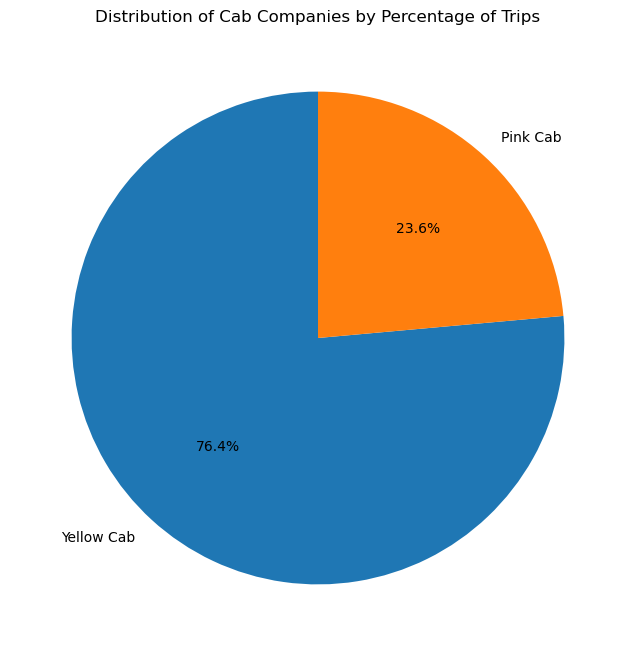

In [38]:
# Plot a pie chart to visualize the distribution of cab companies
plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cab Companies by Percentage of Trips')

# Display the plot
plt.show()


#### Step 5: Data Integration
Using the cleaned data, we build relations and merge between the datasets whose fields are of interest to the analysis

In [39]:
# Build a relationship between the City and Cab_Data dataset
cab_city_data = cab.merge(city, on="City", how='left')

In [40]:
# Merge customer dataset to transaction
transaction_customer_data = transactions.merge(customer, on="Customer ID", how='left')

In [41]:
# Creating a master dataset from the given datasets using inner join to remove unwanted rows
master_data = transaction_customer_data.merge(cab_city_data, on="Transaction ID", how='inner')

In [42]:
# Set color palette for visualizations
sns.set_palette("Set2")

In [43]:
# Display the master dataset
master_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,814885,24701
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,814885,24701
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,418859,127001
359388,10440104,53286,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,418859,127001
359389,10440105,52265,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,418859,127001
359390,10440106,52175,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,418859,127001


In [44]:
# Check unique ID:
unique_ids = master_data['Transaction ID'].unique()
print("Number of unique IDs: {}".format(len(unique_ids)))

# Check duplicated IDs:
duplicated_ids = master_data['Transaction ID'].duplicated()
print("Number of duplicated records before dropping:", duplicated_ids.sum())

# Set color palette for visualizations
sns.set_palette("Paired")

# Display the results
plt.show()

Number of unique IDs: 359392
Number of duplicated records before dropping: 0


In [45]:
# Select numerical columns
num_col = master_data.select_dtypes(include=np.number)

# Remove unwanted columns
num_col.drop(columns=['Transaction ID', 'Customer ID'], inplace=True)

# Calculate statistical summary
summary = num_col.describe().T

# Set color palette for visualizations
sns.set_palette("Set2")

# Display the statistical summary
summary

,count,mean,std,min,25%,50%,75%,max
Age,359392.0,3.533670e+01,1.259423e+01,18.0,25.0000,33.00,42.00,65.00
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.0,8424.0000,14685.00,21035.00,35000.00
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.9,12.0000,22.44,32.96,48.00
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.0,151.2000,282.48,413.68,691.20
Population,359392.0,3.132198e+06,3.315194e+06,248968.0,671238.0000,1595037.00,8405837.00,8405837.00
Users,359392.0,1.583656e+05,1.008501e+05,3643.0,80021.0000,144132.00,302149.00,302149.00


In [46]:
# Create custom columns

# Year column
master_data['Year'] = master_data['Date of Travel'].apply(lambda t: "CY" + str(t.year))

# Quarter column
master_data['Quarter'] = master_data['Date of Travel'].apply(lambda time: "Q" + str(time.quarter))

# Month column
master_data['Month'] = master_data['Date of Travel'].apply(lambda time: time.month_name())

# Day column
master_data['Day'] = master_data['Date of Travel'].apply(lambda time: time.day_name())

# Profit column
master_data["Profit"] = np.round(master_data["Price Charged"] - master_data["Cost of Trip"], 2)

# City Usage (percentage of users per city population)
master_data["City %Usage"] = np.round((master_data["Users"] / master_data["Population"]) * 100, 2)

In [47]:
# Income status
def income_stats(fig):
    if fig > master_data['Income (USD/Month)'].mean():
        return "Higher than the Average"
    else:
        return "Lower than the Average"

master_data['Income Status'] = master_data['Income (USD/Month)'].map(income_stats)

In [48]:
# Distance status
def KM_stats(fig):
    if fig > master_data['KM Travelled'].mean():
        return "Higher than the Average"
    else:
        return "Lower than the Average"

master_data['Distance Status'] = master_data['KM Travelled'].map(KM_stats)

In [49]:
# Set color palette for visualizations
sns.set_palette("tab10")

In [50]:
# Show the transformed data
master_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Quarter,Month,Day,Profit,City %Usage,Income Status,Distance Status
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,CY2016,Q1,January,Friday,57.32,3.03,Lower than the Average,Higher than the Average
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,CY2016,Q1,January,Wednesday,23.67,3.03,Lower than the Average,Higher than the Average
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,814885,24701,CY2016,Q1,January,Saturday,27.57,3.03,Lower than the Average,Lower than the Average
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,814885,24701,CY2016,Q1,January,Thursday,25.80,3.03,Higher than the Average,Higher than the Average
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,814885,24701,CY2016,Q1,January,Sunday,16.84,3.03,Lower than the Average,Lower than the Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,418859,127001,CY2018,Q1,January,Monday,5.88,30.32,Higher than the Average,Lower than the Average
359388,10440104,53286,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,418859,127001,CY2018,Q1,January,Thursday,6.90,30.32,Lower than the Average,Lower than the Average
359389,10440105,52265,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,418859,127001,CY2018,Q1,January,Friday,87.42,30.32,Lower than the Average,Higher than the Average
359390,10440106,52175,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,418859,127001,CY2018,Q1,January,Friday,32.14,30.32,Lower than the Average,Lower than the Average


#### Step 6: Time Series Analysis
Compare trends, patterns, or seasonal effects

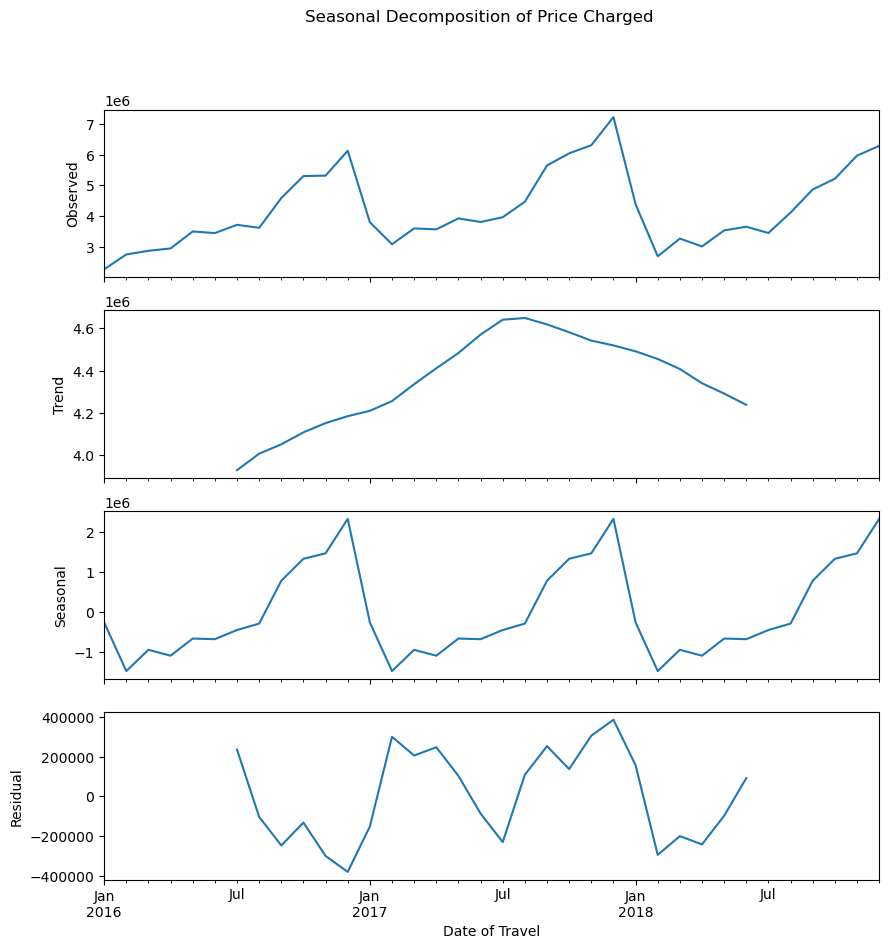

In [51]:
# Convert the "Date of Travel" column to datetime
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# Set "Date of Travel" as the index
master_data.set_index('Date of Travel', inplace=True)

# Resample the data to a specific frequency (e.g., monthly)
monthly_data = master_data['Price Charged'].resample('M').sum()

# Perform seasonal decomposition to analyze trend, seasonality, and residuals
decomposition = seasonal_decompose(monthly_data, model='additive')

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
decomposition.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')

# Set the title for the plot
plt.suptitle('Seasonal Decomposition of Price Charged')

# Display the plot
plt.show()

#### Step 7: Comparative Data Analysis

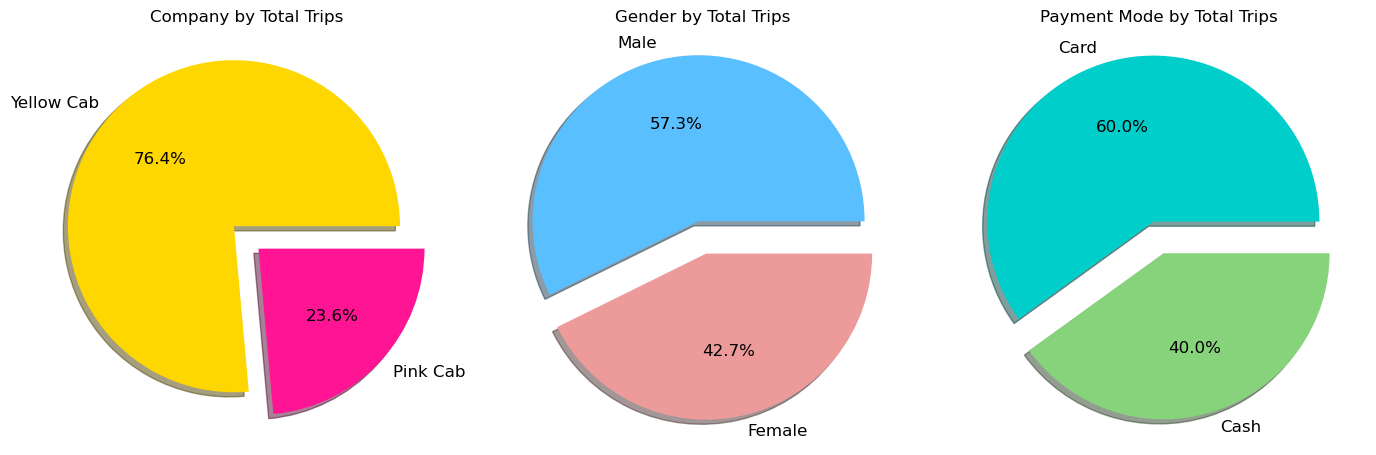

In [52]:
# Distribution of Cab type usage, Gender usage and Payment mode  

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Company distribution
company_counts = master_data['Company'].value_counts()
axes[0].pie(company_counts, labels=company_counts.index, explode=[0.1] * len(company_counts), autopct='%1.1f%%', shadow=True, colors=['gold', 'deeppink'], textprops={'fontsize': 12})
axes[0].set_title("Company by Total Trips")

# Gender distribution
gender_counts = master_data['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, explode=[0.1] * len(gender_counts), autopct='%1.1f%%', shadow=True, colors=["#59BFFF", "#EC9B9A"], textprops={'fontsize': 12})
axes[1].set_title("Gender by Total Trips")

# Payment mode distribution
payment_mode_counts = master_data['Payment_Mode'].value_counts()
axes[2].pie(payment_mode_counts, labels=payment_mode_counts.index, explode=[0.1] * len(payment_mode_counts), autopct='%1.1f%%', shadow=True, colors=["#00CECB", "#87D37C"], textprops={'fontsize': 12})
axes[2].set_title("Payment Mode by Total Trips")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


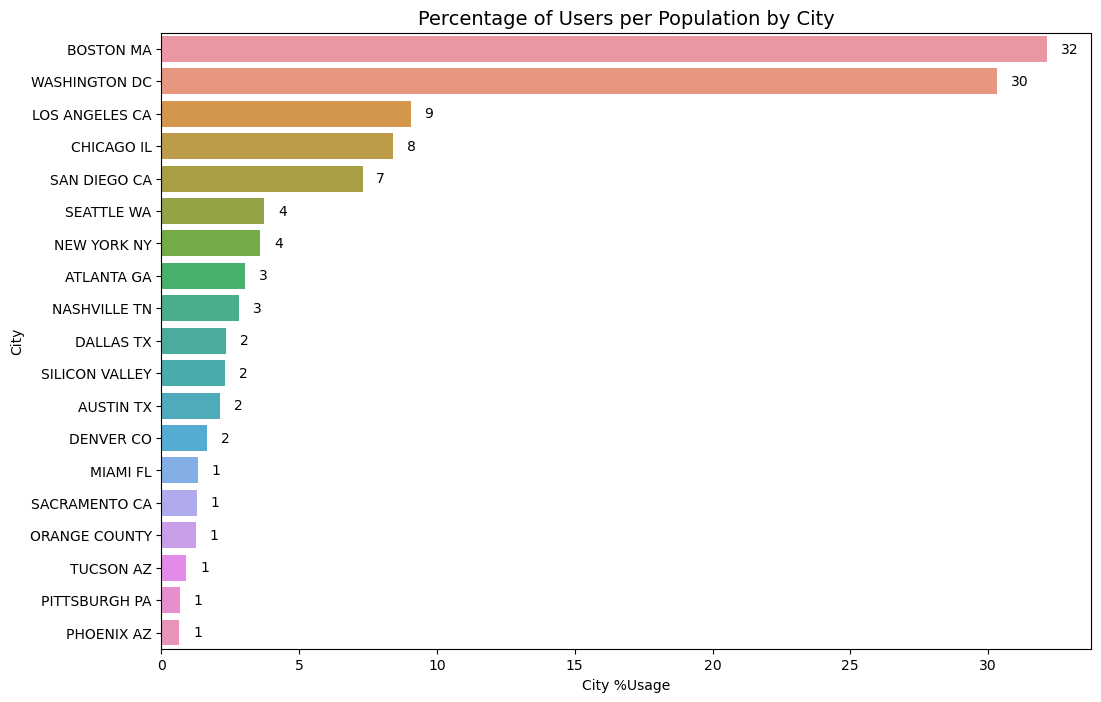

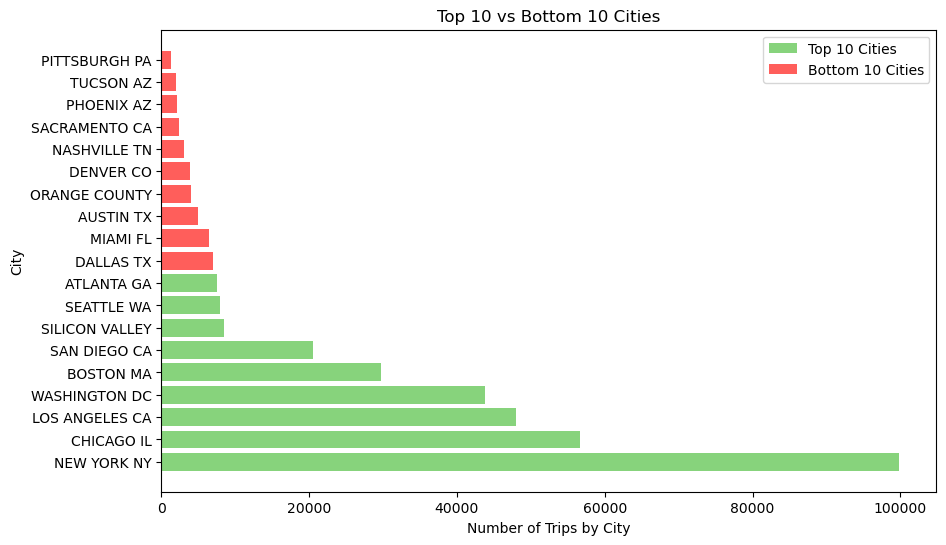

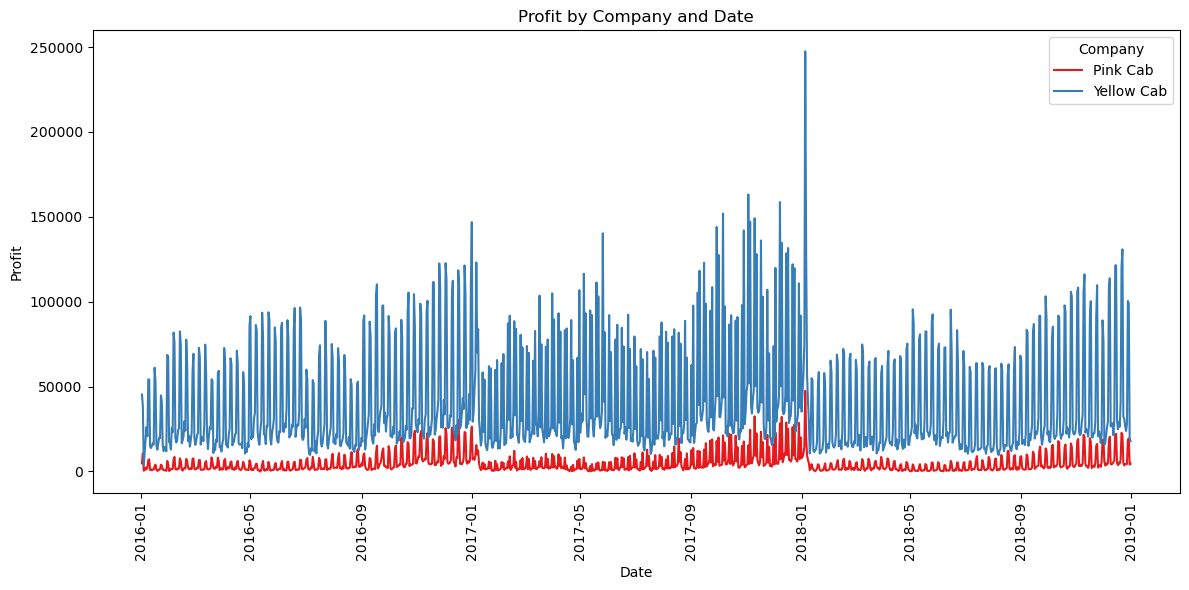

In [53]:
# Distribution of City Usage by Cab Type

# Set figure size
plt.figure(figsize=(12, 8))

# Bar plot: Cities by Company and City Usage
usage = sns.barplot(y="City", x='City %Usage', data=master_data.sort_values(by='City %Usage', ascending=False), orient="h", ci=None)
usage.set_title("Percentage of Users per Population by City", fontsize=14)

# Label each bar in the bar plot
for p in usage.patches:
    height = p.get_height()
    width = p.get_width()
    usage.text(x=width + 0.5, y=p.get_y() + (height / 2), s='{:.0f}'.format(width), va='center')

# Count the number of trips for each city
city_counts = master_data['City'].value_counts()

# Slice the top and bottom 10 cities
top_cities = city_counts[:10]
bottom_cities = city_counts[-10:]

# Create a combined bar plot for the top and bottom cities
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_cities.index, top_cities.values, color="#87D37C", label='Top 10 Cities')
ax.barh(bottom_cities.index, bottom_cities.values, color='#FF5E5B', label='Bottom 10 Cities')
ax.set_title('Top 10 vs Bottom 10 Cities')
ax.set_xlabel('Number of Trips by City')
ax.set_ylabel('City')
ax.legend()

# Create a new DataFrame with the sum of profit per date and company
profit_by_date = master_data.groupby(['Date of Travel', 'Company'])['Profit'].sum().reset_index()
profit_by_date.columns = ['Date', 'Company', 'Profit']

# Set up line plot for Profit by Company and Date
plt.figure(figsize=(12, 6))
company_palette = sns.color_palette("Set1", n_colors=len(profit_by_date['Company'].unique()))

# Line plot for profit by company and date
sns.lineplot(x='Date', y='Profit', data=profit_by_date, hue='Company', palette=company_palette)

# Set the title and axis labels
plt.title('Profit by Company and Date')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

#### Step 8: Independent Samples t-test (Profit between two different cab companies)

Hypothesis:
Null Hypothesis (H0): There is no significant difference in the mean Profit between two different cab companies.
Alternative Hypothesis (H1): There is a significant difference in the mean Profit between two different cab companies.

In [57]:
from scipy import stats


# Extract profit for Yellow Cab and Pink Cab
yellow_cab_profit = master_data[master_data['Company'] == 'Yellow Cab']['Profit']
pink_cab_profit = master_data[master_data['Company'] == 'Pink Cab']['Profit']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(yellow_cab_profit, pink_cab_profit, equal_var=False)

# Print the results
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent Samples t-test:
t-statistic: 230.99549661698165
p-value: 0.0


The t-statistic value of 230.995 suggests a large difference between the means of the two groups. This indicates that the average profit earned by one cab company is significantly different from the average profit earned by the other cab company.

Since the p-value is very close to zero, we can reject the null hypothesis and conclude that there is a significant difference in the mean profit between Yellow Cab and Pink Cab.

#### Step 9: Chi-Square Test of Independence (Company and Payment_Mode)

Hypothesis:
Null Hypothesis (H0): There is no association between the cab company and the payment mode.
Alternative Hypothesis (H1): There is an association between the cab company and the payment mode.

In [58]:
from scipy.stats import chi2_contingency

# Create a contingency table of Company and Payment_Mode
contingency_table = pd.crosstab(master_data['Company'], master_data['Payment_Mode'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test of Independence:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-Square Test of Independence:
Chi-Square Statistic: 0.3733235887859897
p-value: 0.5411981778304723
Degrees of Freedom: 1
Expected Frequencies:
[[ 50795.67531832  33915.32468168]
 [164708.32468168 109972.67531832]]


Chi-Square Statistic: The chi-square statistic is relatively small (0.3733235887859897), indicating that there is a small discrepancy between the observed and expected frequencies.

Degrees of Freedom: There is 1 degree of freedom, which is determined by the number of categories minus 1.

p-value: The p-value is 0.5411981778304723, which is greater than the typical significance level of 0.05. This suggests that there is no significant association between the cab company and the payment mode. In other words, the choice of payment mode does not depend on the cab company (Pink Cab or Yellow Cab) in a statistically significant way.

Expected Frequencies: The expected frequencies indicate the frequencies that would be expected under the assumption of independence. They provide a reference for comparing the observed frequencies.

In summary, based on the given test results, there is no evidence to suggest a significant association between the Pink Cab and Yellow Cab companies and the payment mode used. The choice of payment mode appears to be independent of the cab company.

#### Step 10: Pearson's correlation coefficient (Fare and Profit)

Hypothesis:
Null Hypothesis (H0): There is no linear relationship between Fare and Profit.
Alternative Hypothesis (H1): There is a linear relationship between Fare and Profit.

In [59]:
from scipy.stats import chi2_contingency

# Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(master_data['Price Charged'], master_data['Profit'])
print("\nPearson's correlation coefficient:")
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson's correlation coefficient:
Correlation coefficient: 0.8641539283017353
p-value: 0.0


The results suggest that there is a strong positive relationship between the price charged and profit in the dataset. As the price charged for a trip increases, the profit tends to increase as well. This information can be valuable for understanding the relationship between pricing strategies and profitability in the cab companies.

In [60]:
from scipy.stats import f_oneway

# Filter the data for Pink Cab and Yellow Cab
pink_cab_data = master_data[master_data['Company'] == 'Pink Cab']['Price Charged']
yellow_cab_data = master_data[master_data['Company'] == 'Yellow Cab']['Price Charged']

# Perform ANOVA
f_statistic, p_value = f_oneway(pink_cab_data, yellow_cab_data)

# Print the results
print("Analysis of Variance (ANOVA) results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Analysis of Variance (ANOVA) results:
F-statistic: 19704.36689781986
p-value: 0.0


The average prices charged by Pink Cab and Yellow Cab are not the same. The p-value of 0.0 suggests that this difference is not due to random chance alone. There is strong evidence to support the conclusion that the mean price charged varies significantly between these two cab companies.

In summary, the ANOVA test indicates that there is a statistically significant difference in the average price charged between Pink Cab and Yellow Cab.

#### Step 11:  Chi-Square Test of Independence (Age and Payment Mode)

In [62]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(master_data['Payment_Mode'], master_data['Age'])

# Conduct the Chi-Square Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test of Independence:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Square Test of Independence:
Chi-Square Statistic: 63.33145967898115
p-value: 0.05610251903391298
Degrees of Freedom: 47
Expected Frequencies:
[[6503.64054848 6950.36857804 7332.93566913 6854.4269878  7073.29374054
  7391.69989315 6686.52920488 7179.42912474 6988.74521414 7213.60831627
  6693.72482415 6401.10297391 6694.92409403 6554.00988336 7171.0342356
  6870.01749622 7090.68315377 6329.14678123 6628.3646158  6647.55293384
  6539.61864482 7074.49301042 6917.3886564  2309.79378506 2380.55070786
  2292.40437183 2233.64014781 2547.24922091 2349.36969103 2450.70799573
  2218.64927433 2493.2820764  2451.9072656  2357.16494524 2269.01860921
  2183.27081293 2284.60911762 2063.94346007 2243.83394177 2082.53214318
  2462.70069451 2439.31493188 2263.62189476 2615.00796901 2116.7113347
  2238.43722732 2343.37334164 2026.16645891]
 [4342.35945152 4640.63142196 4896.06433087 4576.5730122  4722.70625946
  4935.30010685 4464.47079512 4793.57087526 4666.25478586 4816.39168373
  4469.27517585 42

Implications:
The obtained p-value (0.05610251903391298) is greater than the typical significance level of 0.05. Therefore, we do not have enough evidence to conclude that there is a statistically significant relationship between the age of customers and their payment mode. However, the p-value is relatively close to the significance level, suggesting a marginal level of association.

In simpler terms, based on the test results, there is some indication that the age of customers might have a weak relationship with their preferred payment mode. However, this relationship is not statistically significant at the conventional significance level. Additional analysis or a larger sample size may be needed to provide a more conclusive understanding of the relationship between age and payment mode.

It is important to note that statistical tests provide evidence based on probability, and the results should be interpreted with caution. Other factors and variables not considered in this test could also influence the relationship between age and payment mode.